In [ ]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lead_df1=pd.read_csv('Leads.csv')
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#inspecting the data

In [ ]:
lead_df1.shape

(9240, 37)

In [ ]:
lead_df1[lead_df1['Do Not Email'].isna()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [ ]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


WE HAVE 9240 ROWS AND 37 COLUMNS IN OUR DATASET

In [ ]:
## cleaning

We will replace 'SELECT' with NaN as it means the customer did not select any value. So, it has no use in the modeling

In [ ]:
lead_df1= lead_df1.replace('Select', np.nan)

Now, we check for null values excluding Select, which are present in the dataset.

In [ ]:
##Checking for null value percentages
round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


We can go ahead and drop the variables with null value percentages higher than 40%.

In [ ]:
##dropping columns with null values greater than 40%
lead_df1= lead_df1.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','Lead Quality','Lead Profile'],axis=1)

In [ ]:
##Finding the null value percentages after dropping the above columns
round(100*(lead_df1.isnull().sum()/len(lead_df1.index)),2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [ ]:
##Check for unique values across the dataset.
lead_df1.nunique()

,0
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114


Since the columns with low variance and same observations all across the dataset does not help with the analysis, we can drop those columns from the dataset. The columns from the above list include-'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Magazine'.

In [ ]:
##dropping columns with just one value across the dataset.
lead_df1=lead_df1.drop(columns=['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Magazine'],axis=1)

In [ ]:
##check percentage of missing values
round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


WE SEE CERTAIN COLUMNS WITH HIGH NULL VALUES, BUT  WE CANNOT DROP THEM AS THEY ARE IMPORTANT FOR ANALYSIS. SO, WE GO FOR THE VARIABLE ANALYSIS AND IMPUTATION.

1)Country- This column has almost 27% missing values. We will see how its imputation is done.

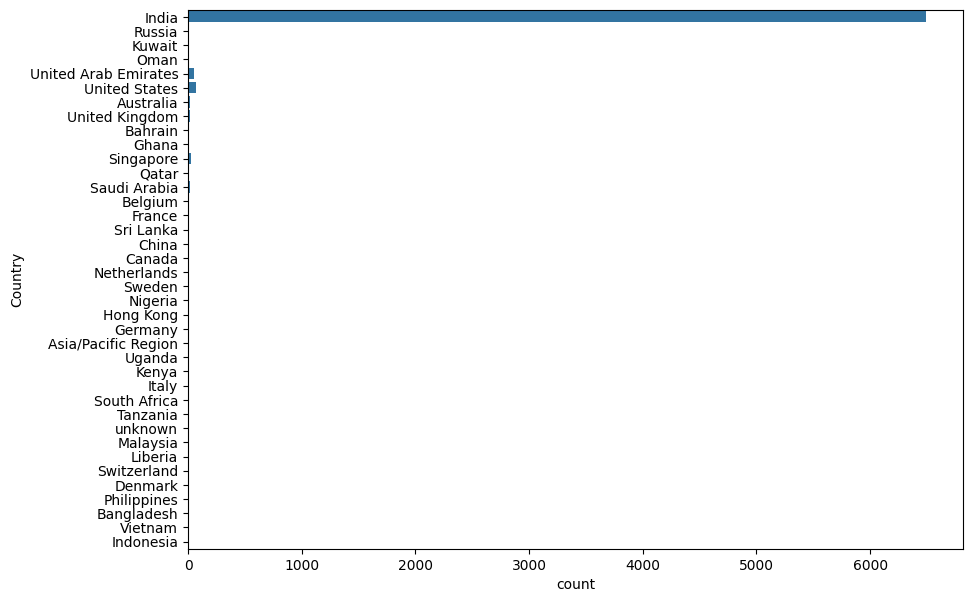

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(lead_df1['Country'])
plt.show()

It is possible that the options given might not contain the answer to the variable, so it was left out and thus counted as null. For those null values, we can impute them to fill the missing data as not provided.

In [ ]:
lead_df1['Country']= lead_df1['Country'].replace(np.nan,'Not provided')

In [ ]:
lead_df1['Country'].value_counts()

,count
Country,
India,6492
Not provided,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


According to the values, the other countries in total are very less in numbers.So, we can create a category others for all of the other countries to decrease data scattering.


In [ ]:
def country_name(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not provided":
        category = "Not provided"
    else:
        category = "other_countries"
    return category

lead_df1['Country'] = lead_df1.apply(lambda x:country_name(x['Country']), axis = 1)
lead_df1['Country'].value_counts()

,count
Country,
India,6492
Not provided,2461
other_countries,287


2) Specialization- This column has 36.5% missing values. Let us visualize through graph how we need to impute the missing data.

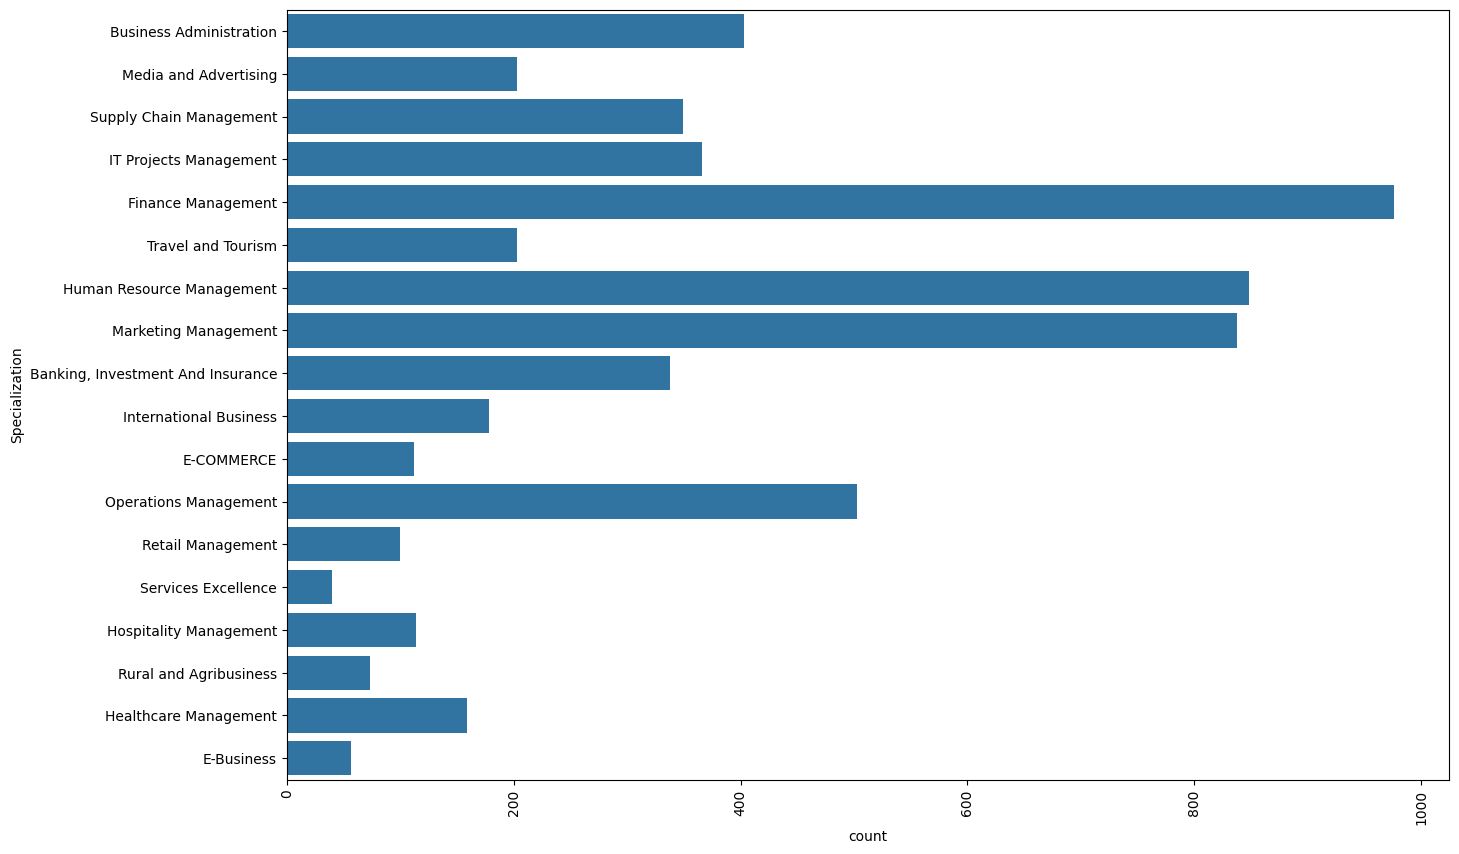

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(lead_df1['Specialization'])
plt.xticks(rotation=90)
plt.show()

The data is normally distributed and it is highly possible that the potential visitor of site might not be specialized in any field or it may not be mentioned in the options.Thus, we could create another category for the missing or nan values.

In [ ]:
##Create a category for missing values.
lead_df1['Specialization'] = lead_df1['Specialization'].replace(np.nan, 'Others')

In [ ]:
round(lead_df1['Specialization'].value_counts(normalize=True),2)

,proportion
Specialization,
Others,0.37
Finance Management,0.11
Human Resource Management,0.09
Marketing Management,0.09
Operations Management,0.05
Business Administration,0.04
IT Projects Management,0.04
Supply Chain Management,0.04
"Banking, Investment And Insurance",0.04


3) What is your current occupation- This variable has almost 30% missing values.

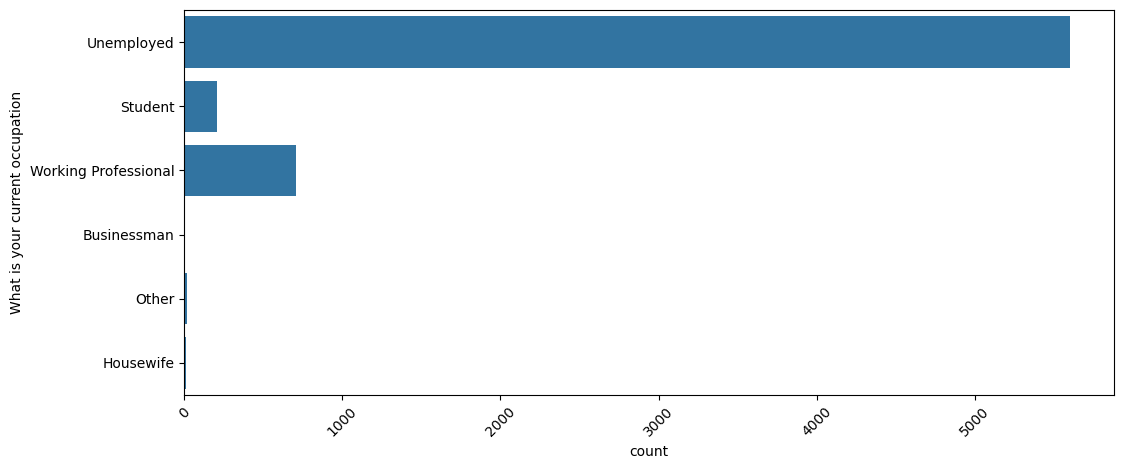

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(lead_df1['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

Since it also contains 'other' as an option, we might want to impute the missing values as unemployed.This is the only reason why some visitors chose not mention it and left it blank.So, we now fill the missing values as unemployed.

In [ ]:
#Percentage of the different categories of this column:
round(lead_df1['What is your current occupation'].value_counts(normalize=True),2)

,proportion
What is your current occupation,
Unemployed,0.85
Working Professional,0.11
Student,0.03
Other,0.00
Housewife,0.00
Businessman,0.00


In [ ]:
##imputing missing values with 'unemployed' as the data shows.
lead_df1['What is your current occupation']=lead_df1['What is your current occupation'].replace(np.nan,'Unemployed')

In [ ]:
round(lead_df1['What is your current occupation'].value_counts(normalize=True),2)

,proportion
What is your current occupation,
Unemployed,0.90
Working Professional,0.08
Student,0.02
Other,0.00
Housewife,0.00
Businessman,0.00


4) 'What matters most to you in choosing a course'- This column has almost 30% missing values. Let us visualize the categories of columns using a plot.

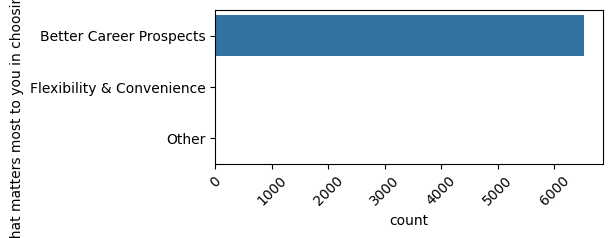

In [ ]:
plt.figure(figsize=(5,2))
sns.countplot(lead_df1['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

It is a highly skewed column and it shows that though it had categories 'other', it was not choosen as an answer. Thus, most likely the visitors have missed ticking the box or did not want to. Going according the data, we may want to fill the missing values with 'Better Career Prospects' as it makes sense why someone would want to enroll in a course.

In [ ]:
lead_df1['What matters most to you in choosing a course']= lead_df1['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

From the missing values list, we can see that the columns-'Cities' has almost 40% missing values, so we can go ahead and drop this too.

In [ ]:
lead_df1= lead_df1.drop('City',axis=1)

5) 'Tags'- The column Tags has 36% missing values.Let us visualize the column categories

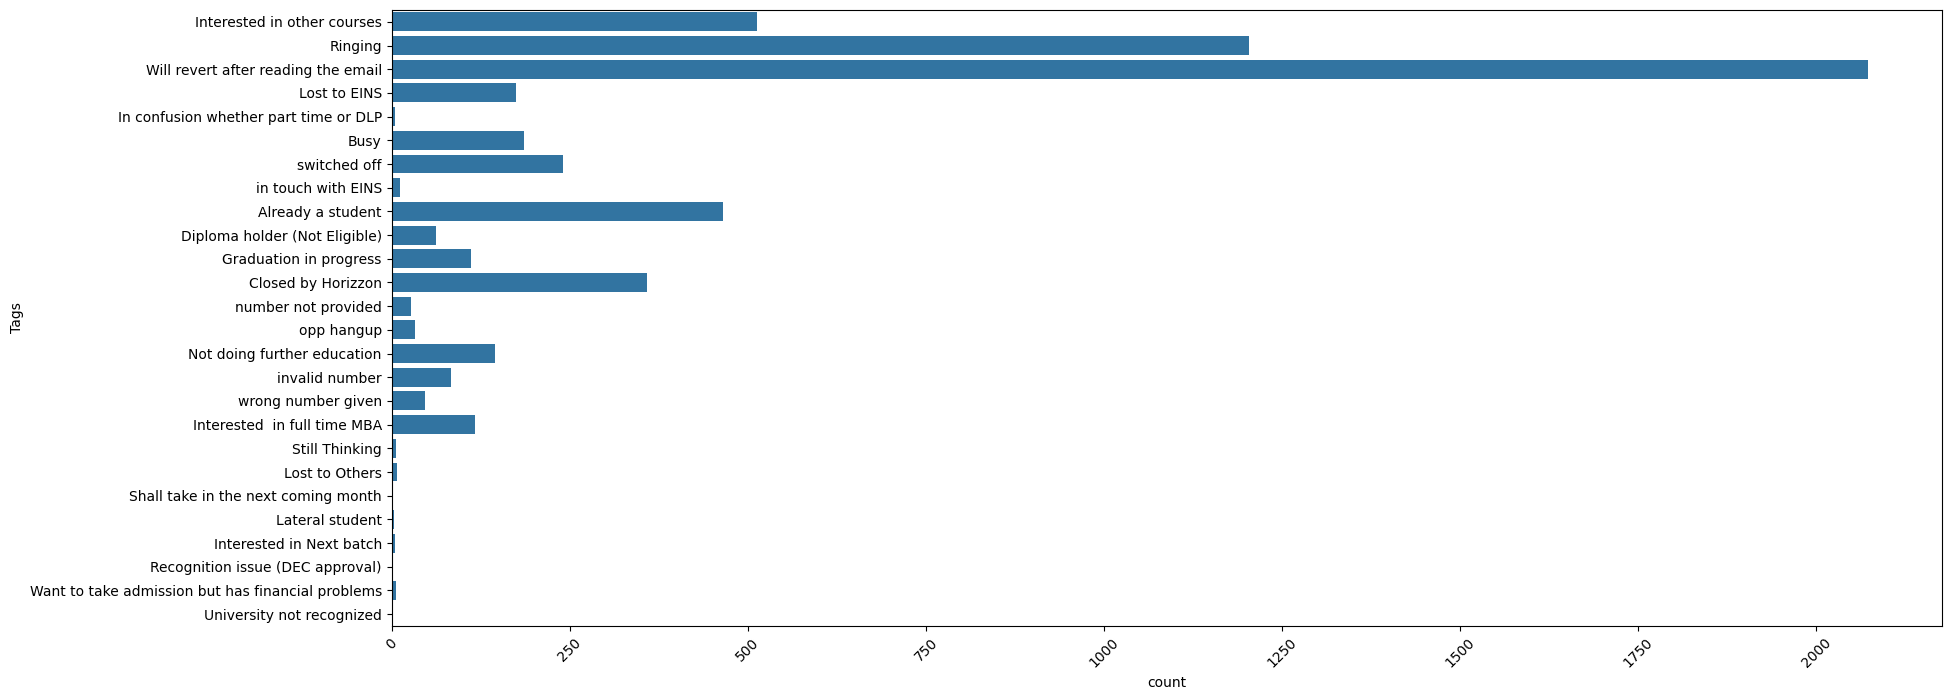

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(lead_df1['Tags'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
round(lead_df1['Tags'].value_counts(normalize=True),2)

,proportion
Tags,
Will revert after reading the email,0.35
Ringing,0.20
Interested in other courses,0.09
Already a student,0.08
Closed by Horizzon,0.06
switched off,0.04
Busy,0.03
Lost to EINS,0.03
Not doing further education,0.02


Since the categories value counts- 'will revert after reading the email' has highest proportion of values indicating potential leads and thus cannot be ignored, we can impute the missing values as the highest category count. This would increase the chances of not missing out on potential leads.

In [ ]:
## imputing missing data
lead_df1['Tags']=lead_df1['Tags'].replace(np.nan,'Will revert after reading the email')

In [ ]:
##RECHECKING THE PERCENTAGE OF MISSING VALUES.
round(lead_df1.isnull().sum()/len(lead_df1.index),2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.00
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,0.01
Total Time Spent on Website,0.00
Page Views Per Visit,0.01


In [ ]:
# Removing Id values since they are not of any use in analysis
lead_df1_final = lead_df1.drop('Prospect ID',axis=1)
lead_df1_final.shape

(9240, 23)

In [ ]:
lead_df1[lead_df1.isna().any(axis=1)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,No,Modified
8490,95832f2b-d5b1-47c7-8be4-4523a358ae25,584932,Lead Add Form,NaN,No,No,0,0.0,0,0.0,...,Better Career Prospects,No,No,No,No,No,No,Ringing,No,SMS Sent
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,No,Modified
9087,915593f3-5db2-4a8f-8f7d-7936f6f00ca1,580713,Lead Add Form,Reference,No,No,1,NaN,1525,NaN,...,Better Career Prospects,No,No,No,No,No,No,Closed by Horizzon,No,Modified


Rest of the missing values are under 2%.This does not hamper our analysis any further and thus cleaning of data is completed.

# EDA

Checking for duplicates, if any.

In [ ]:
lead_df1_final[lead_df1.duplicated()]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity


In [ ]:
lead_df1_final.loc[lead_df1.duplicated()]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity


The data does not have any duplicates.

In [ ]:
lead_df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

# **CONVERTED**- This is the target variable which signifies how many visitors or potential customers/leads enrolled in the course

A value of 0 means the lead did not enroll and a value of 1 means the lead successfully converted

In [ ]:
Converted = (sum(lead_df1_final['Converted'])/len(lead_df1_final['Converted'].index))*100
Converted

38.53896103896104

This shows that the potential leads which converted are 38.5%

In [ ]:
lead_df1_final.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

1) LEAD ORIGIN

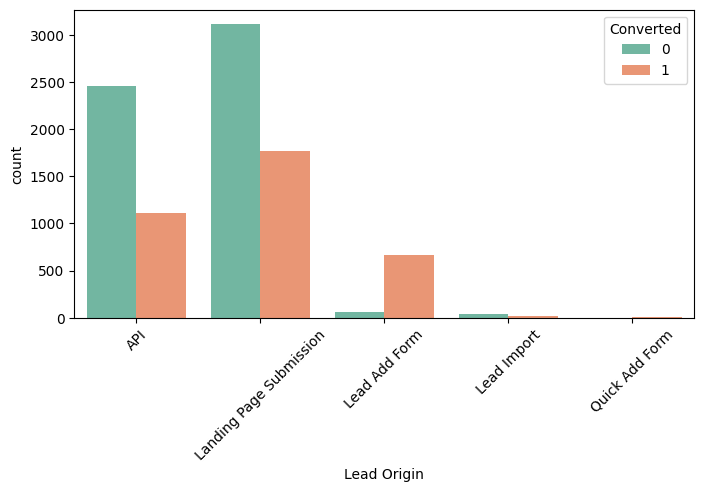

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x ="Lead Origin",hue="Converted", data = lead_df1_final,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

INFERENCE DRAWN:

*   The API and Landing Page Submission have considerable lead counts, whereas the converted leads account to almost 31-35%.
*   Lead Add form has very high conversion rate, but the count of leads is quite low.

**Improving lead conversion rate of API and Landing Page Submission origins via enhancing websites and softwares can help in the business.Since Lead Add Form have higher rate of conversion, focus should be on that too.**






2) LEAD SOURCE

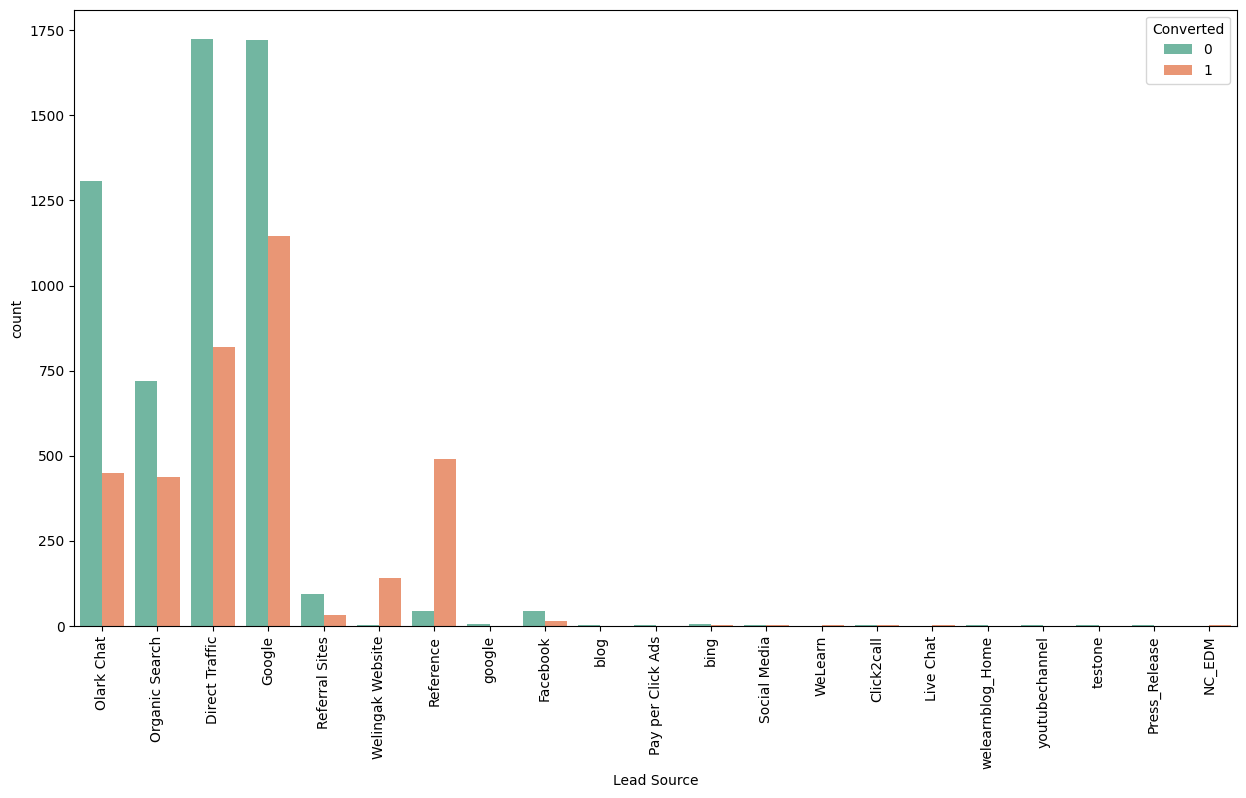

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x ="Lead Source",hue="Converted", data = lead_df1_final,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead_df1_final['Lead Source'] = lead_df1_final['Lead Source'].replace(['google'], 'Google')

Since the other Lead sources have not much value, we can categorize them into a single category and then visualize the converted leads altogether, **reducing noise in data visualization.**

In [ ]:
lead_df1_final['Lead Source']= lead_df1_final['Lead Source'].replace(['Pay per Click Ads', 'bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], 'Other Sources')

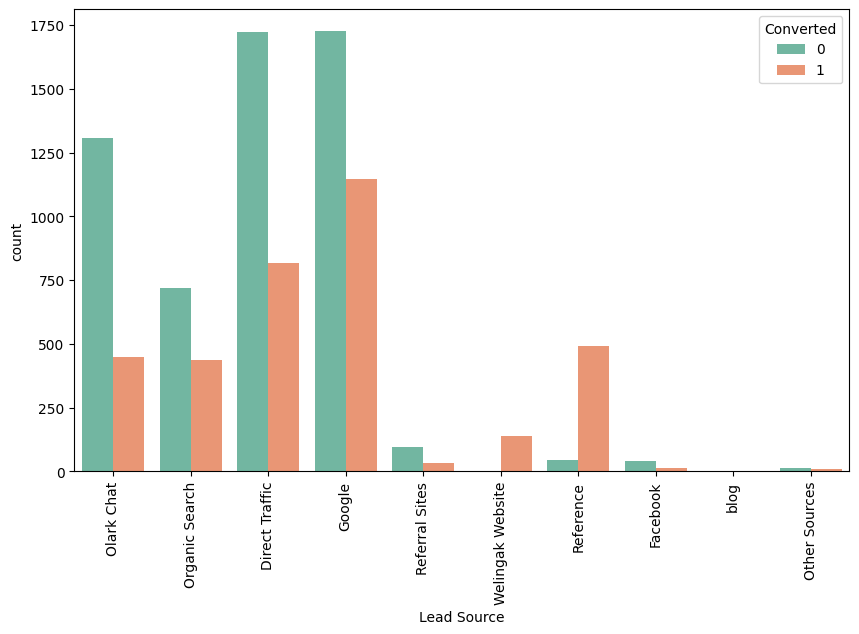

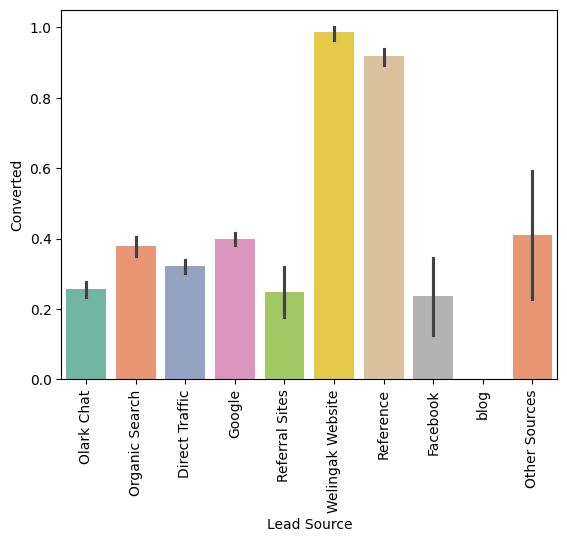

In [ ]:
##Revisualize the column-
plt.figure(figsize=(10,6))
sns.countplot(x ="Lead Source",hue="Converted", data = lead_df1_final,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

sns.barplot(x ="Lead Source",y="Converted", data = lead_df1_final,palette='Set2')
# plt.show()
plt.xticks(rotation = 90)
plt.show()

INFERENCE DRAWN-


*   Google and Direct Traffic has the most generation of leads, whereas the converted leads account to almost 35% .
*   Welingak Website and Reference has the highest percentages of leads which converted; Welingak Website being the top source via which leads converted.


  **Since Olark Chat and Organic Search are seen to have high lead counts, we can infer that improving the mentioned sources along with Google and Direct Traffic would be useful for the organization.**






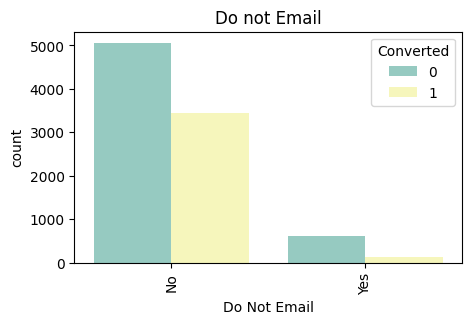

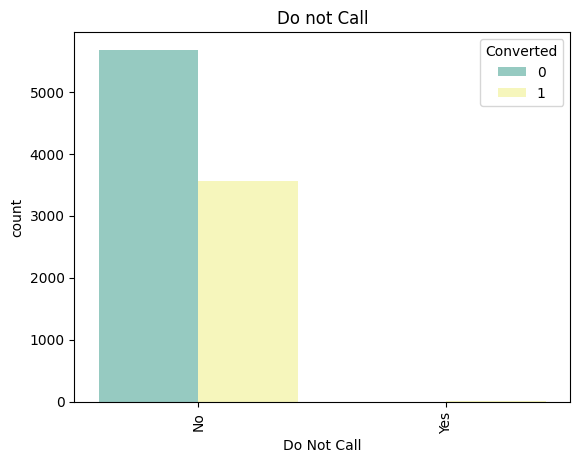

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df1_final,palette='Set3')
plt.xticks(rotation = 90)
plt.title('Do not Email')
plt.show()
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df1_final,palette='Set3')
plt.xticks(rotation = 90)
plt.title('Do not Call')
plt.show()

INFERENCE DRAWN-
Most of the lead count figures are 'No', thus no significant insights can be drawn from these columns.

## **From the info aforementioned, we know that Total Visits, Total Time Spent on Website, Page Views Per Visit are numerical columns.**
So, we will plot boxplots for them and look for the percentile range along with outliers.


*   Also, we might encounter outliers, so we are going to cap those and visualize again.


In [ ]:
lead_df1_final['TotalVisits'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,TotalVisits
count,9103.000000
mean,3.445238
std,4.854853
min,0.000000
5%,0.000000
10%,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
90%,7.000000


As we conclude, there might be outliers present due to the large difference in percentile values at 95%, 99% and maximum.
We would be capping the outliers at 95th percentile for normal distribution.

In [ ]:
##Capping the outliers-
percentile_value = lead_df1_final['TotalVisits'].quantile([0.05,0.95]).values
print(percentile_value[0])
print(percentile_value[1])
lead_df1_final['TotalVisits'][lead_df1_final['TotalVisits'] <= percentile_value[0]] = percentile_value[0]
lead_df1_final['TotalVisits'][lead_df1_final['TotalVisits'] >= percentile_value[1]] = percentile_value[1]

0.0
10.0


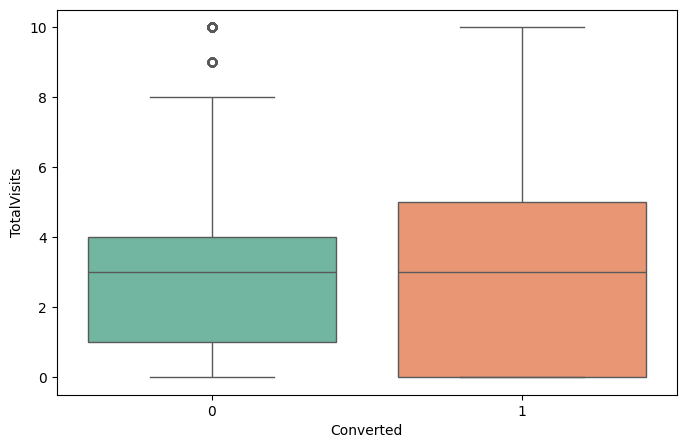

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y='TotalVisits', x='Converted', data= lead_df1_final, palette='Set2')
plt.show()

INFERENCE DRAWN-
Since the median of the column is almost the same for Converted and Non-Converted leads, no significant insight could be drawn.

In [ ]:
lead_df1_final['Total Time Spent on Website'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,Total Time Spent on Website
count,9240.000000
mean,487.698268
std,548.021466
min,0.000000
5%,0.000000
10%,0.000000
25%,12.000000
50%,248.000000
75%,936.000000
90%,1380.000000


From the information above, we could say that the column contains very few or no outliers and so we will create the boxplot directly to visualize the column.

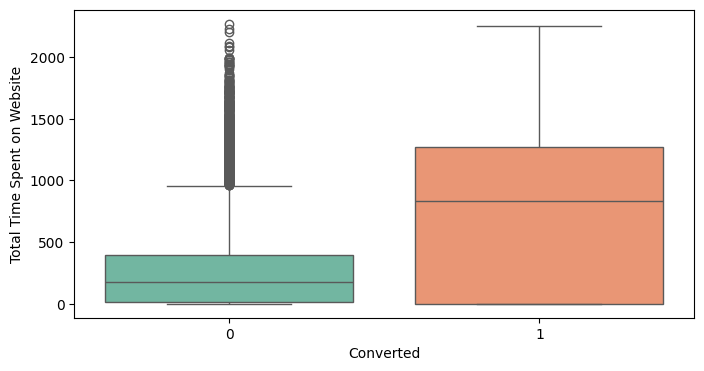

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Total Time Spent on Website', x='Converted', data= lead_df1_final, palette='Set2')
plt.show()

INFERENCE DRAWN-
Leads who spend more time on websites are likely to get converted. So, we should focus more on improving website efficiency and transparency.Content enhancement and engaging might help in increasing the converted leads.

In [ ]:
lead_df1_final['Page Views Per Visit'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,Page Views Per Visit
count,9103.000000
mean,2.362820
std,2.161418
min,0.000000
5%,0.000000
10%,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
90%,5.000000


Concluding from the above data, there might be outlier present. So, we cap the outliers to 95th percentile.

In [ ]:
percentile_range = lead_df1_final['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df1_final['Page Views Per Visit'][lead_df1_final['Page Views Per Visit'] <= percentile_range[0]] = percentile_range[0]
lead_df1_final['Page Views Per Visit'][lead_df1_final['Page Views Per Visit'] >= percentile_range[1]] = percentile_range[1]

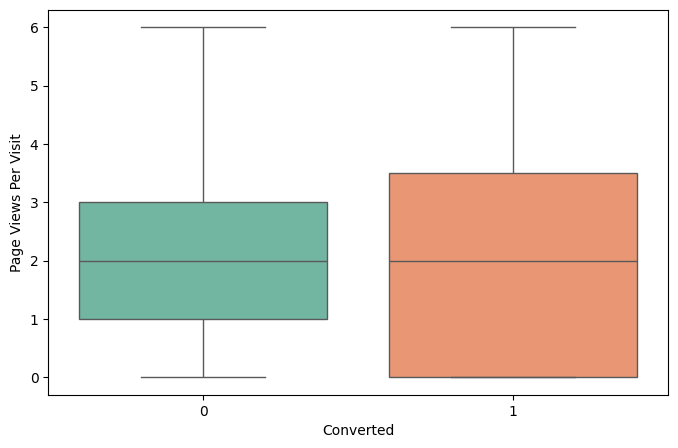

In [ ]:
##Visualize the column-
plt.figure(figsize=(8,5))
sns.boxplot(y='Page Views Per Visit', x='Converted', data= lead_df1_final, palette='Set2')
plt.show()

INFERENCE DRAWN-

Since the median for the converted and non-converted leads are same, nothing notable could be concluded from this column.

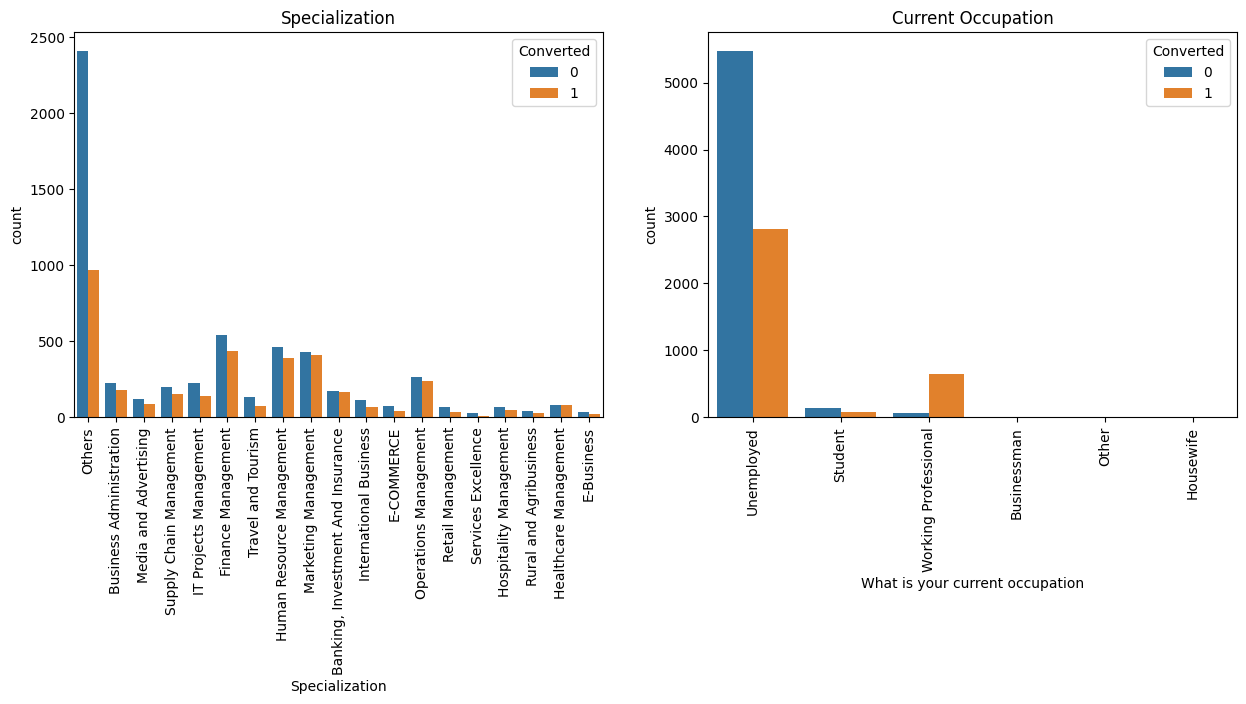

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()


INFERENCE DRAWN-

Most of the working professional leads converted and almost 30% of unemployed leads converted.

Focus should be on other specialization apart from the categories in the data which help in generating leads.

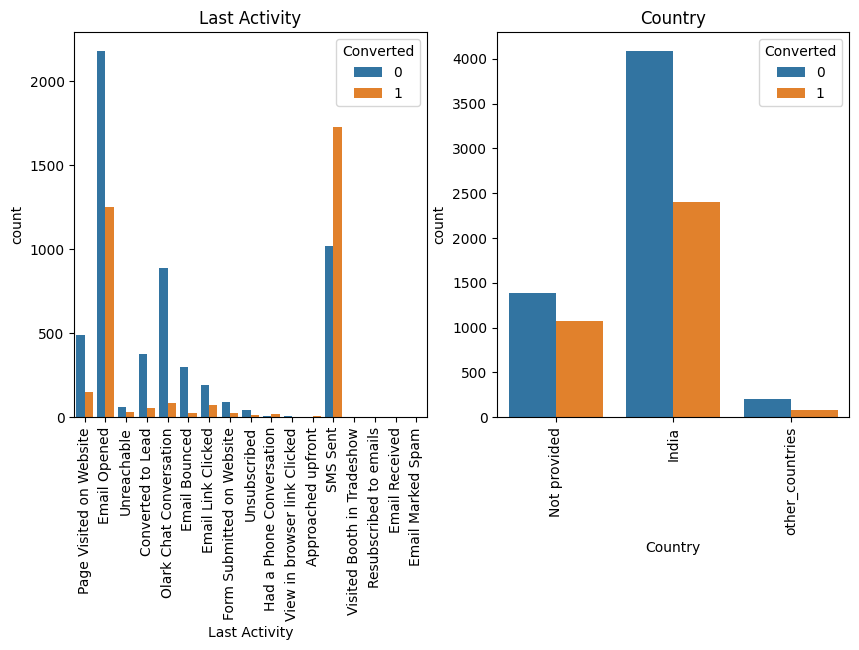

In [ ]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


INFERENCE DRAWN-

Leads whose last activity was SMS Sent are more likely to get converted and also those who opened their respective emails last were noted to be converted.
Since India is the only country where the count of potential leads is the most, therefore the highest conversion rate is also seen in India.Thus, Country is not a significant parameter for analysis.

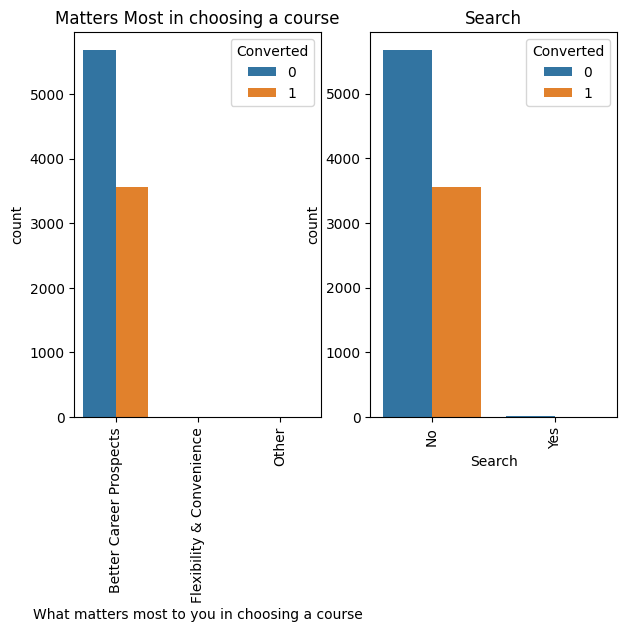

In [ ]:
plt.figure(figsize = (7,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Matters Most in choosing a course')
# plt.show()


plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()


INFERENCE DRAWN-

Leads who sought better career prospects are most likely to get converted.Most of the leads have the same reason and thus nothing notable could be used for analysis.
Whereas no such insights could be drawn from 'Search' columns as most of the count comes under 'no' parameter.


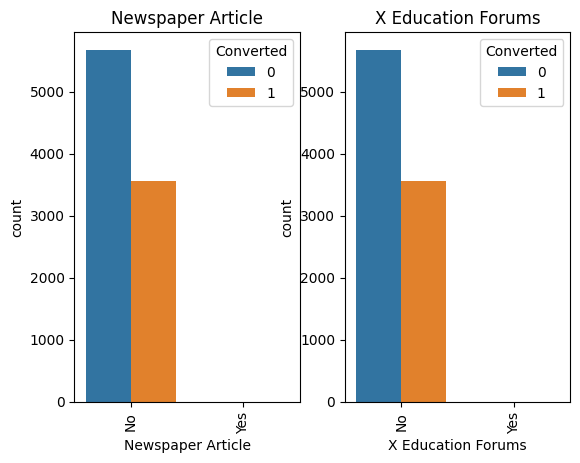

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
# plt.show()


plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()


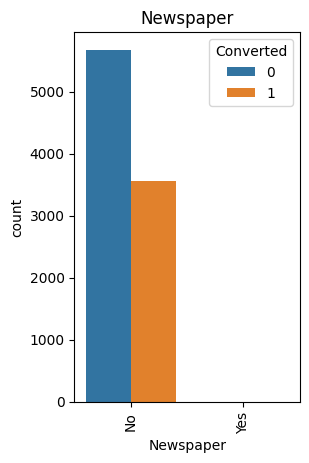

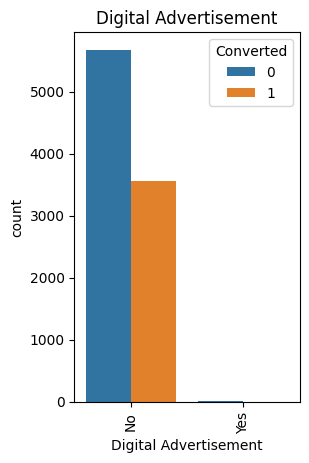

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90,)
plt.title('Newspaper')
plt.show()


plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

No inference could be drawn from columns named- Newspaper Article, X Education Forums, Newspaper, Digital Advertisement as most of the data is under 'No' parameter.These columns may be deemed unnecessary for analysis and could also be dropped.

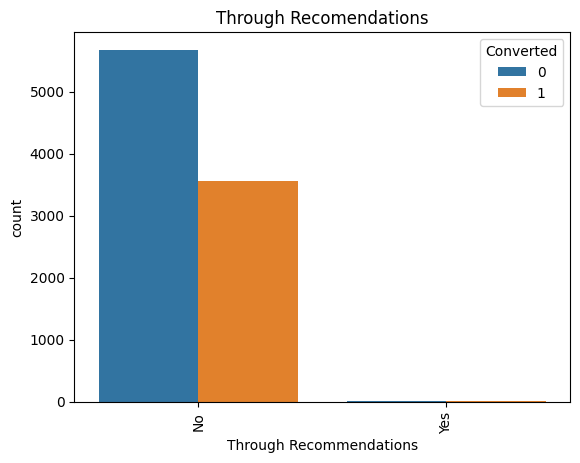

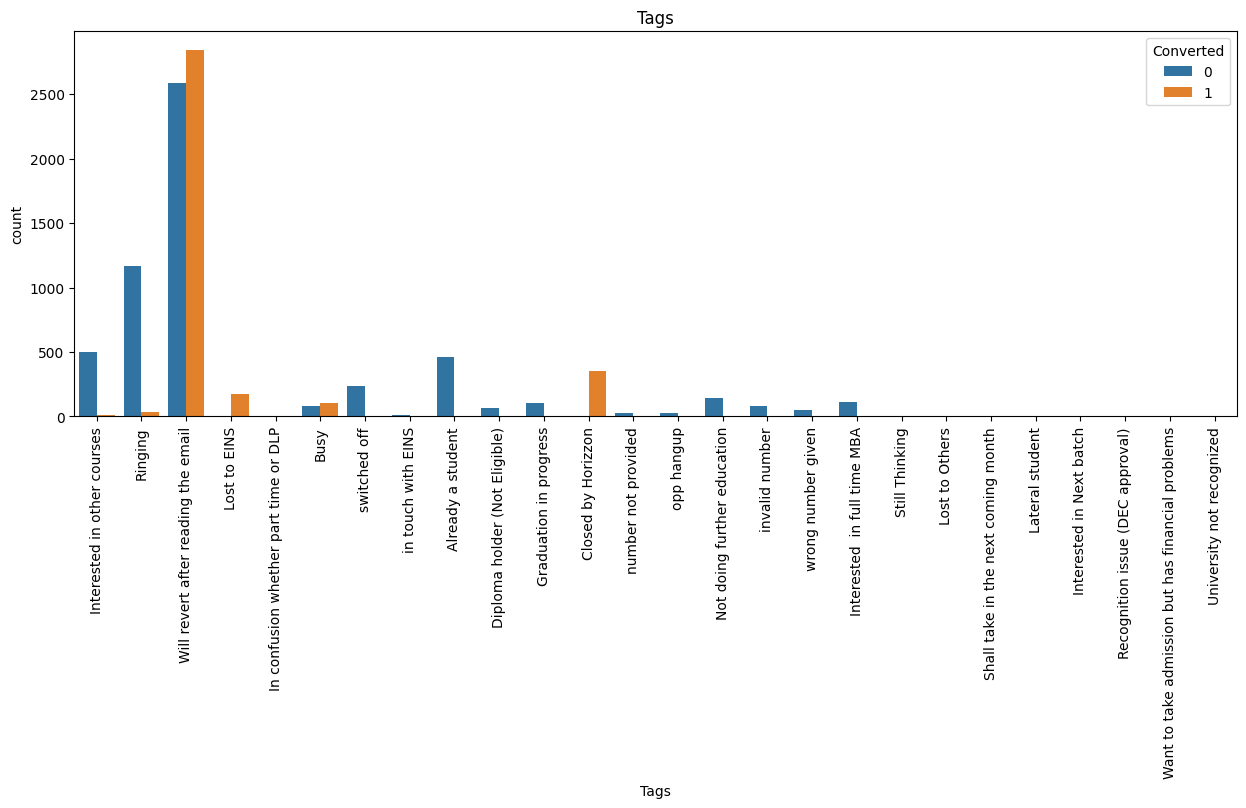

In [ ]:


sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90,)
plt.title('Through Recomendations')
plt.show()

plt.figure(figsize=(15,5))

sns.countplot(x='Tags', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show()

INFERENCE DRAWN-

Leads tagged as those who mentioned' will revert after reading the email' are mostly likely to get converted (almost more than 50%).
Nothing could be inferred from the lead count through recommendations.


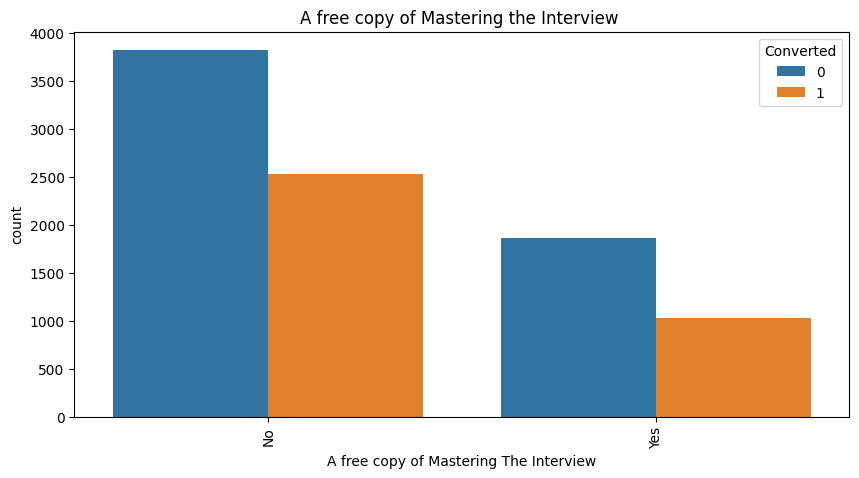

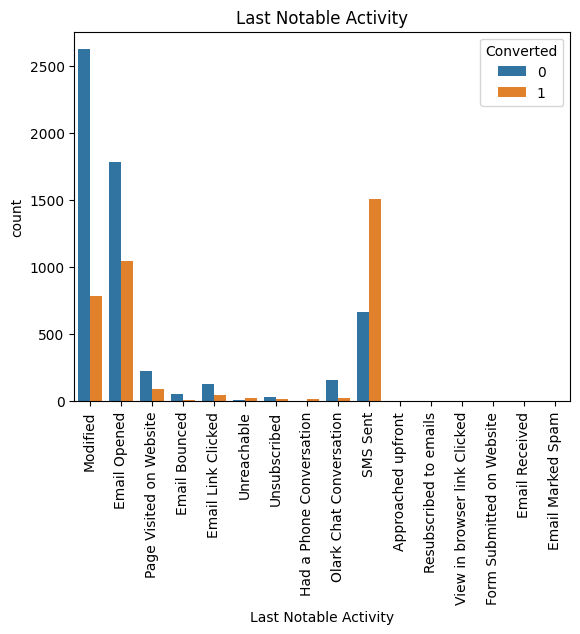

In [ ]:
plt.figure(figsize=(10,5))


sns.countplot(x="A free copy of Mastering The Interview", hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering the Interview ')
plt.show()



sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df1_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

INFERENCE DRAWN-
Same as Last activity, leads having Last notable activity as SMS Sent are most likly to get converted.


**From the above Exploratory Data analysis, we can conclude that most of the columns are not adding any value to the model, and thus can be dropped to reduce noise and increase model precision with respect to the factors actually affecting the model and analysis.**

In [ ]:
##correct this again- left the column
##lead_df1_final= lead_df1_final.drop(['Lead Number','Tags','Country','Search','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],axis=1)
lead_df1_final=lead_df1_final.drop(['What matters most to you in choosing a course'],axis=1)

In [ ]:
lead_df1_final.shape

(9240, 22)

In [ ]:
lead_df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 9240 non-null   obje

# DATA PREPARATION

For data preparation, we first convert the binary variables into 1/0 for easy interpretation and suitability for algorithms.

In [ ]:
variable1 =  ['Do Not Email', 'Do Not Call']

def bin_mapping(x):
    return x.map({"No": 0, "Yes": 1})
lead_df1_final[variable1] = lead_df1_final[variable1].apply(bin_mapping)

In [ ]:
lead_df1_final

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,...,Unemployed,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,...,Unemployed,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,...,Student,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,...,Unemployed,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,...,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,...,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,...,Unemployed,No,No,No,No,No,No,wrong number given,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,...,Unemployed,No,No,No,No,No,No,invalid number,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,...,Unemployed,No,No,No,No,No,No,Will revert after reading the email,No,SMS Sent


TO REPRESENT CATEGORICAL DATA IN NUMERIC FORMAT, WE CREATE **DUMMY VARIABLES**

In [ ]:
##creating dummy variables and dropping the original columns.
dummy_var= pd.get_dummies(lead_df1_final[['Lead Origin','Lead Source','Specialization','Last Notable Activity','Last Activity','What is your current occupation']],drop_first=True)
dummy_var.head(10)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
## Convert to int
dummy_var= dummy_var.astype(int)

In [ ]:
### Adding to main df
main_cols_dummy=['Lead Origin','Lead Source','Specialization','Last Notable Activity','Last Activity','What is your current occupation']
lead_df1_final=pd.concat([lead_df1_final,dummy_var],axis=1)

In [ ]:
lead_df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Lead Origin                                           9240 non-null   object 
 2   Lead Source                                           9204 non-null   object 
 3   Do Not Email                                          9240 non-null   int64  
 4   Do Not Call                                           9240 non-null   int64  
 5   Converted                                             9240 non-null   int64  
 6   TotalVisits                                           9103 non-null   float64
 7   Total Time Spent on Website                           9240 non-null   int64  
 8   Page Views Per Visit                                  9103

In [ ]:
## Drop the repeated columns of dummies
lead_df1_final = lead_df1_final.drop(main_cols_dummy,axis=1)

In [ ]:
lead_df1_final.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0,0.0,0,0.0,Not provided,No,No,...,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,0,5.0,674,2.5,India,No,No,...,0,0,0,0,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.0,India,No,No,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,0,1.0,305,1.0,India,No,No,...,0,1,0,0,0,0,0,0,1,0
4,660681,0,0,1,2.0,1428,1.0,India,No,No,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
lead_df1_final= lead_df1_final.drop(['Lead Number','Tags','Country','Search','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],axis=1)

In [ ]:
lead_df1_final.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
lead_df1_final = lead_df1_final.dropna()

### Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = lead_df1_final.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Do Not Call                                           9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   Lead Origin_Landing Page Submission                   9103 non-null   int64  
 6   Lead Origin_Lead Add Form                             9103 non-null   int64  
 7   Lead Origin_Lead Import                               9103 non-null   int64  
 8   Lead Origin_Quick Add Form                            9103 non-

In [ ]:
# Putting response variable to y
y = lead_df1_final['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 7962 to 5734
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   int64  
 1   Do Not Call                                           6372 non-null   int64  
 2   TotalVisits                                           6372 non-null   float64
 3   Total Time Spent on Website                           6372 non-null   int64  
 4   Page Views Per Visit                                  6372 non-null   float64
 5   Lead Origin_Landing Page Submission                   6372 non-null   int64  
 6   Lead Origin_Lead Add Form                             6372 non-null   int64  
 7   Lead Origin_Lead Import                               6372 non-null   int64  
 8   Lead Origin_Quick Add Form                            6372 n

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 7962 to 5734
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   int64  
 1   Do Not Call                                           6372 non-null   int64  
 2   TotalVisits                                           6372 non-null   float64
 3   Total Time Spent on Website                           6372 non-null   float64
 4   Page Views Per Visit                                  6372 non-null   float64
 5   Lead Origin_Landing Page Submission                   6372 non-null   int64  
 6   Lead Origin_Lead Add Form                             6372 non-null   int64  
 7   Lead Origin_Lead Import                               6372 non-null   int64  
 8   Lead Origin_Quick Add Form                            6372 n

In [ ]:
### Checking the converted Rate
Converted_rate = (sum(lead_df1_final['Converted'])/len(lead_df1_final['Converted'].index))*100
Converted_rate

38.02043282434362

### Looking at Correlations

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,0,0,-0.068258,1.476324,-0.423364,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5520,0,0,1.362470,-0.771066,2.083179,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0,0,0.647106,-0.571257,0.133646,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1566,0,0,2.435517,1.393834,0.690655,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,0,0,-1.141305,-0.881052,-1.258878,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
corr_matrix = X_train.corr()
strong_corr = corr_matrix[abs(corr_matrix) > 0.7]  # Keep only correlations above 0.5
# plt.figure(figsize=(30, 20))
# sns.heatmap(strong_corr, annot=True, cmap='coolwarm')
# plt.show()
strong_corr

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do Not Call,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalVisits,NaN,NaN,1.000000,NaN,0.765997,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Time Spent on Website,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page Views Per Visit,NaN,NaN,0.765997,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What is your current occupation_Housewife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
What is your current occupation_Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
What is your current occupation_Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
What is your current occupation_Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.855183


### Model Building

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.1
Date:                Sun, 16 Mar 2025   Deviance:                       5128.1
Time:                        17:04:24   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.5156   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.3421      0.216     -6.225      0.000      -1.765      -0.920
Do Not Call                                             22.6088   5.16e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.3418      0.056      6.098      0.000       0.232       0.452
Total Time Spent on Website                              1.0777      0.041     26.413      0.000       0.998       1.158
Page Views Per Visit                                    -0.3455      0.063     -5.524      0.000      -0.468      -0.223
Lead Origin_Landing Page Submission                     -0.8331      0.137     -6.102      0.000      -1.101      -0.566
Lead Origin_Lead Add Form                                3.9266      0.787      4.987      0.000       2.384       5.470
Lead Origin_Lead Import                                  1.3199      1.664      0.793      0.428      -1.941       4.580
Lead Origin_Quick Add Form                             1.71e-09   5.19e-06      0.000      1.000   -1.02e-05    1.02e-05
Lead Source_Facebook                                    -0.2761      1.656     -0.167      0.868      -3.523       2.970
Lead Source_Google                                       0.2632      0.097      2.709      0.007       0.073       0.454
Lead Source_Olark Chat                                   1.1074      0.161      6.869      0.000       0.791       1.423
Lead Source_Organic Search                               0.1281      0.130      0.983      0.325      -0.127       0.383
Lead Source_Other Sources                                0.1263      0.762      0.166      0.868      -1.368       1.621
Lead Source_Reference                                   -0.3900      0.810     -0.481      0.630      -1.978       1.198
Lead Source_Referral Sites                              -0.0995      0.354     -0.281      0.779      -0.794       0.595
Lead Source_Welingak Website                             2.0230      1.059      1.910      0.056      -0.053       4.099
Lead Source_blog                                       -22.2605   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Specialization_Business Administration                  -0.2847      0.243     -1.171      0.242      -0.761       0.192
Specialization_E-Business                                0.6279      0.472      1.329      0.184      -0.298       1.554
Specialization_E-COMMERCE                               -0.3821      0.376     -1.017      0.309      -1.119       0.354
Specialization_Finance Management                       -0

### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)          # running RFE with 115 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 57),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Other Sources', False, 42),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_blog', False, 40),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', False, 37),
 ('Specialization_Finance Management', False, 45),
 ('Specialization_Healthcare Management', False, 39),
 ('Specialization_Hospitality Management', False, 9

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_blog', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'

In [ ]:
##### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Sun, 16 Mar 2025   Deviance:                       5268.6
Time:                        17:04:30   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4080      0.121     -3.368      0.001      -0.645      -0.171
Do Not Email                                            -1.4720      0.164     -8.995      0.000      -1.793      -1.151
Total Time Spent on Website                              1.0810      0.040     27.198      0.000       1.003       1.159
Lead Origin_Landing Page Submission                     -0.9913      0.125     -7.930      0.000      -1.236      -0.746
Lead Origin_Lead Add Form                                3.4366      0.237     14.530      0.000       2.973       3.900
Lead Source_Olark Chat                                   0.9452      0.122      7.774      0.000       0.707       1.183
Lead Source_Welingak Website                             2.4252      0.757      3.202      0.001       0.941       3.910
Specialization_Others                                   -0.9792      0.121     -8.115      0.000      -1.216      -0.743
Last Notable Activity_Had a Phone Conversation           2.0001      1.422      1.407      0.159      -0.786       4.786
Last Notable Activity_SMS Sent                           1.5284      0.080     19.215      0.000       1.373       1.684
Last Notable Activity_Unreachable                        1.6543      0.510      3.244      0.001       0.655       2.654
Last Activity_Converted to Lead                         -1.2750      0.210     -6.083      0.000      -1.686      -0.864
Last Activity_Had a Phone Conversation                   0.9001      0.854      1.054      0.292      -0.774       2.574
Last Activity_Olark Chat Conversation                   -1.4416      0.165     -8.744      0.000      -1.765      -1.118
What is your current occupation_Housewife               23.1880   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Working Professional     2.6796      0.191     14.011      0.000       2.305       3.054
========================================================================================================================
"""

In [ ]:
## Drop High P value >0.050 features i.e Last Notable phone conversation, what is your current occupation housewife
high_p_col= ['Last Activity_Had a Phone Conversation','Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife']
col= col.drop(high_p_col)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.3
Date:                Sun, 16 Mar 2025   Deviance:                       5292.5
Time:                        17:04:30   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3888      0.121     -3.224      0.001      -0.625      -0.152
Do Not Email                                            -1.4815      0.163     -9.062      0.000      -1.802      -1.161
Total Time Spent on Website                              1.0803      0.040     27.251      0.000       1.003       1.158
Lead Origin_Landing Page Submission                     -0.9888      0.125     -7.941      0.000      -1.233      -0.745
Lead Origin_Lead Add Form                                3.4345      0.236     14.535      0.000       2.971       3.898
Lead Source_Olark Chat                                   0.9384      0.121      7.733      0.000       0.701       1.176
Lead Source_Welingak Website                             2.4224      0.757      3.198      0.001       0.938       3.907
Specialization_Others                                   -0.9874      0.120     -8.207      0.000      -1.223      -0.752
Last Notable Activity_SMS Sent                           1.5122      0.079     19.053      0.000       1.357       1.668
Last Notable Activity_Unreachable                        1.6362      0.510      3.209      0.001       0.637       2.636
Last Activity_Converted to Lead                         -1.2917      0.209     -6.167      0.000      -1.702      -0.881
Last Activity_Olark Chat Conversation                   -1.4505      0.165     -8.800      0.000      -1.774      -1.127
What is your current occupation_Working Professional     2.6685      0.191     13.961      0.000       2.294       3.043
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()
# y_train_pred[:10]

,0
7962,0.849345
5520,0.098802
1962,0.048237
1566,0.942492
9170,0.199458


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84934513, 0.09880155, 0.04823727, 0.94249237, 0.19945819,
       0.19945819, 0.4872991 , 0.14080602, 0.53060066, 0.45688614])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.849345,7962
1,0,0.098802,5520
2,0,0.048237,1962
3,1,0.942492,1566
4,0,0.199458,9170


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.849345,7962,1
1,0,0.098802,5520,0
2,0,0.048237,1962,0
3,1,0.942492,1566,1
4,0,0.199458,9170,0


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3497  456]
 [ 734 1685]]


In [ ]:
#         Predicted     not_converted    converted
# Actual
# not_converted        3500               453
# converted            731                1688

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8132454488386692


#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,2.05
6,Specialization_Others,2.02
3,Lead Origin_Lead Add Form,1.54
10,Last Activity_Olark Chat Conversation,1.45
2,Lead Origin_Landing Page Submission,1.43
7,Last Notable Activity_SMS Sent,1.43
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.28
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


All VIF values are under < 5

In [ ]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3497,  456],
       [ 734, 1685]])

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8132454488386692

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6965688300950806

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8846445737414622

In [ ]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.11535542625853781


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.7870154133582438


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8265185535334436


### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

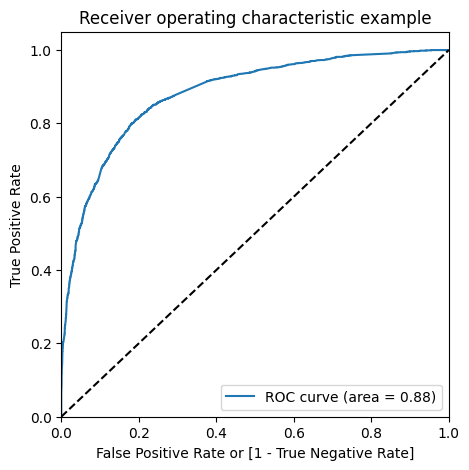

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.849345,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.098802,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.048237,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.942492,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.199458,9170,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.579724  0.972303  0.339489
0.2   0.2  0.771814  0.875568  0.708323
0.3   0.3  0.797866  0.842084  0.770807
0.4   0.4  0.811990  0.776767  0.833544
0.5   0.5  0.813245  0.696569  0.884645
0.6   0.6  0.801946  0.595701  0.928156
0.7   0.7  0.787037  0.518809  0.951176
0.8   0.8  0.757690  0.408020  0.971667
0.9   0.9  0.712649  0.261678  0.988616


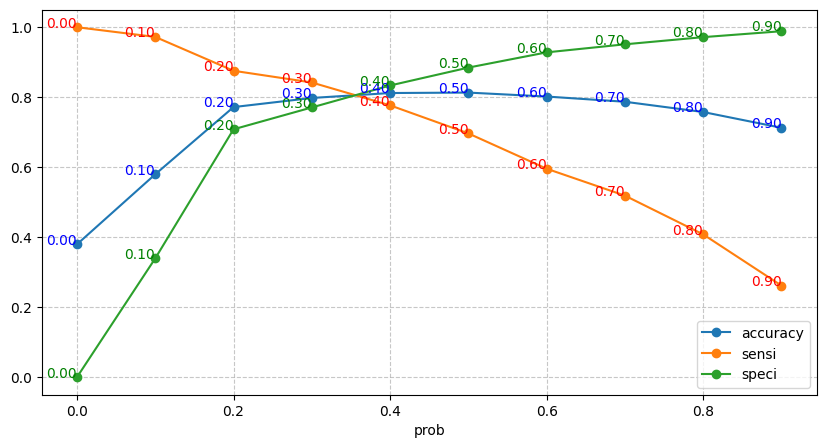

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.


# Plot the graph
# Plot the graph
ax = cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], marker='o', figsize=(10, 5))

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid with transparency

# Annotate each point with its x-value (probability)
for i, row in cutoff_df.iterrows():
    prob = row['prob']  # X-value (probability)

    plt.text(prob, row['accuracy'], f"{prob:.2f}", fontsize=10, ha='right', color='blue')
    plt.text(prob, row['sensi'], f"{prob:.2f}", fontsize=10, ha='right', color='red')
    plt.text(prob, row['speci'], f"{prob:.2f}", fontsize=10, ha='right', color='green')

# Show the plot
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.849345,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.098802,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.048237,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.942492,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.199458,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379630,1.000000,0.000000
0.1,0.1,0.579724,0.972303,0.339489
0.2,0.2,0.771814,0.875568,0.708323
0.3,0.3,0.797866,0.842084,0.770807
0.4,0.4,0.811990,0.776767,0.833544
0.5,0.5,0.813245,0.696569,0.884645
0.6,0.6,0.801946,0.595701,0.928156
0.7,0.7,0.787037,0.518809,0.951176
0.8,0.8,0.757690,0.408020,0.971667
0.9,0.9,0.712649,0.261678,0.988616


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7978656622724419

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3047,  906],
       [ 382, 2037]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))
# Let us calculate specificity
print(TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# Positive predictive value
print(TP / float(TP+FP))
# Negative predictive value
print(TN / float(TN+ FN))

0.8420835055808186
0.7708069820389577
0.22919301796104224
0.6921508664627931
0.8885972586759988


In [ ]:
## Precision and Recall
## Precision
# TP/TP+FP
print(confusion[1,1]/(confusion[0,1]+confusion[1,1]))
##### Recall
# TP / TP + FN
print(confusion[1,1]/(confusion[1,0]+confusion[1,1]))

0.7870154133582438
0.6965688300950806


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7870154133582438

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6965688300950806

In [ ]:
### Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

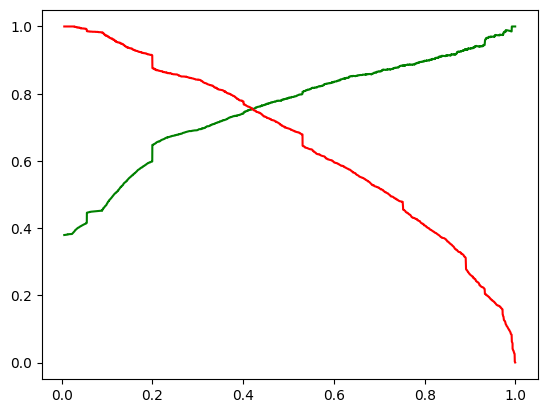

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Others,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional
3504,0,-0.103815,1,0,0,0,0,0,0,0,0,0
4050,0,-0.881052,0,1,0,0,0,1,0,0,0,0
7201,1,0.424120,1,0,0,0,0,1,0,0,0,0
1196,0,-0.105648,1,0,0,0,0,0,0,0,0,0
8219,0,-0.428274,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

,0
3504,0.183954
4050,0.973561
7201,0.291373
1196,0.183657
8219,0.137016
8747,0.199458
9048,0.407154
6524,0.120382
7693,0.118408
8187,0.932055


In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
3504,0.183954
4050,0.973561
7201,0.291373
1196,0.183657
8219,0.137016


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.183954
1,1,4050,0.973561
2,0,7201,0.291373
3,0,1196,0.183657
4,1,8219,0.137016


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,3504,0,0.183954
1,4050,1,0.973561
2,7201,0,0.291373
3,1196,0,0.183657
4,8219,1,0.137016


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,3504,0,0.183954,0
1,4050,1,0.973561,1
2,7201,0,0.291373,0
3,1196,0,0.183657,0
4,8219,1,0.137016,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8106920541926035

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1427,  262],
       [ 255,  787]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.755278310940499

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8448786264061575

In [ ]:
# Feature	Coefficient (coef)	Effect
# Total Time Spent on Website	+1.0803	Higher time → More likely to convert ✅
# Lead Origin_Landing Page Submission	-0.9888	Submitted via Landing Page → Less likely to convert ❌
# Lead Origin_Lead Add Form	+3.4345	Submitted via Lead Add Form → Highly likely to convert ✅✅✅
# Lead Source_Olark Chat	+0.9384	Came from Olark Chat → More likely to convert ✅
# Lead Source_Welingak Website	+2.4224	Came from Welingak Website → More likely to convert ✅✅
# Specialization_Others	-0.9874	‘Others’ specialization → Less likely to convert ❌
# Do Not Email	-1.4815	Opted out of emails → Less likely to convert ❌❌
# Last Notable Activity_SMS Sent	+1.5122	Received SMS → More likely to convert ✅
# Last Notable Activity_Unreachable	+1.6362	Unreachable last time → More likely to convert (follow-ups?) ✅
# Last Activity_Converted to Lead	-1.2917	Previously converted → Less likely to convert again ❌
# Last Activity_Olark Chat Conversation	-1.4505	Engaged in Olark Chat but did not convert → Less likely to convert ❌
# What is your current occupation_Working Professional	+2.6685	Working Professionals → More likely to convert ✅✅

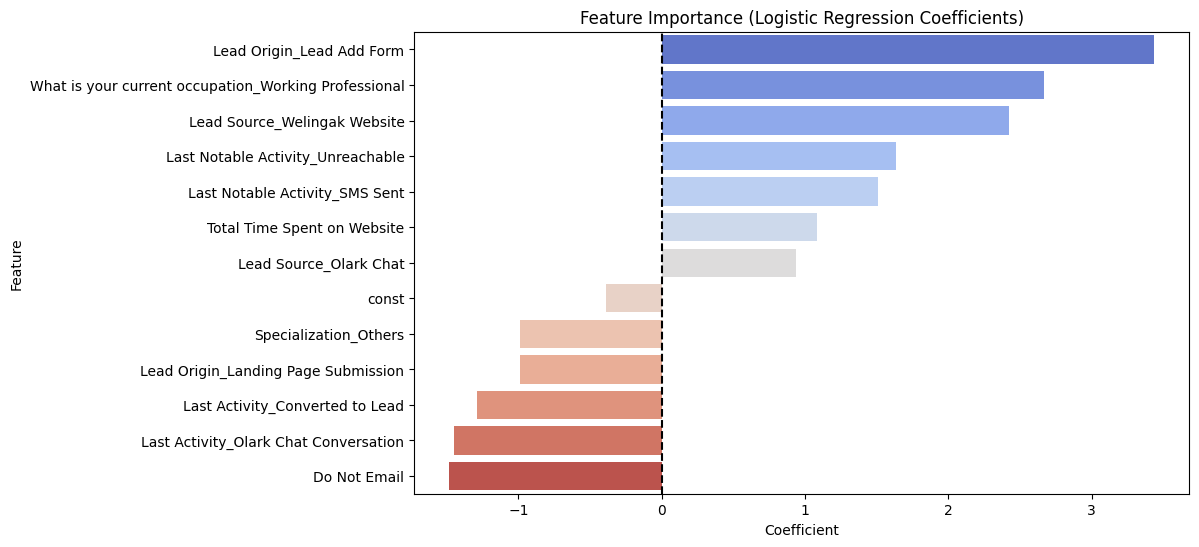

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract coefficients
feature_importance = pd.DataFrame({'Feature': X_train_sm.columns, 'Coefficient': res.params})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

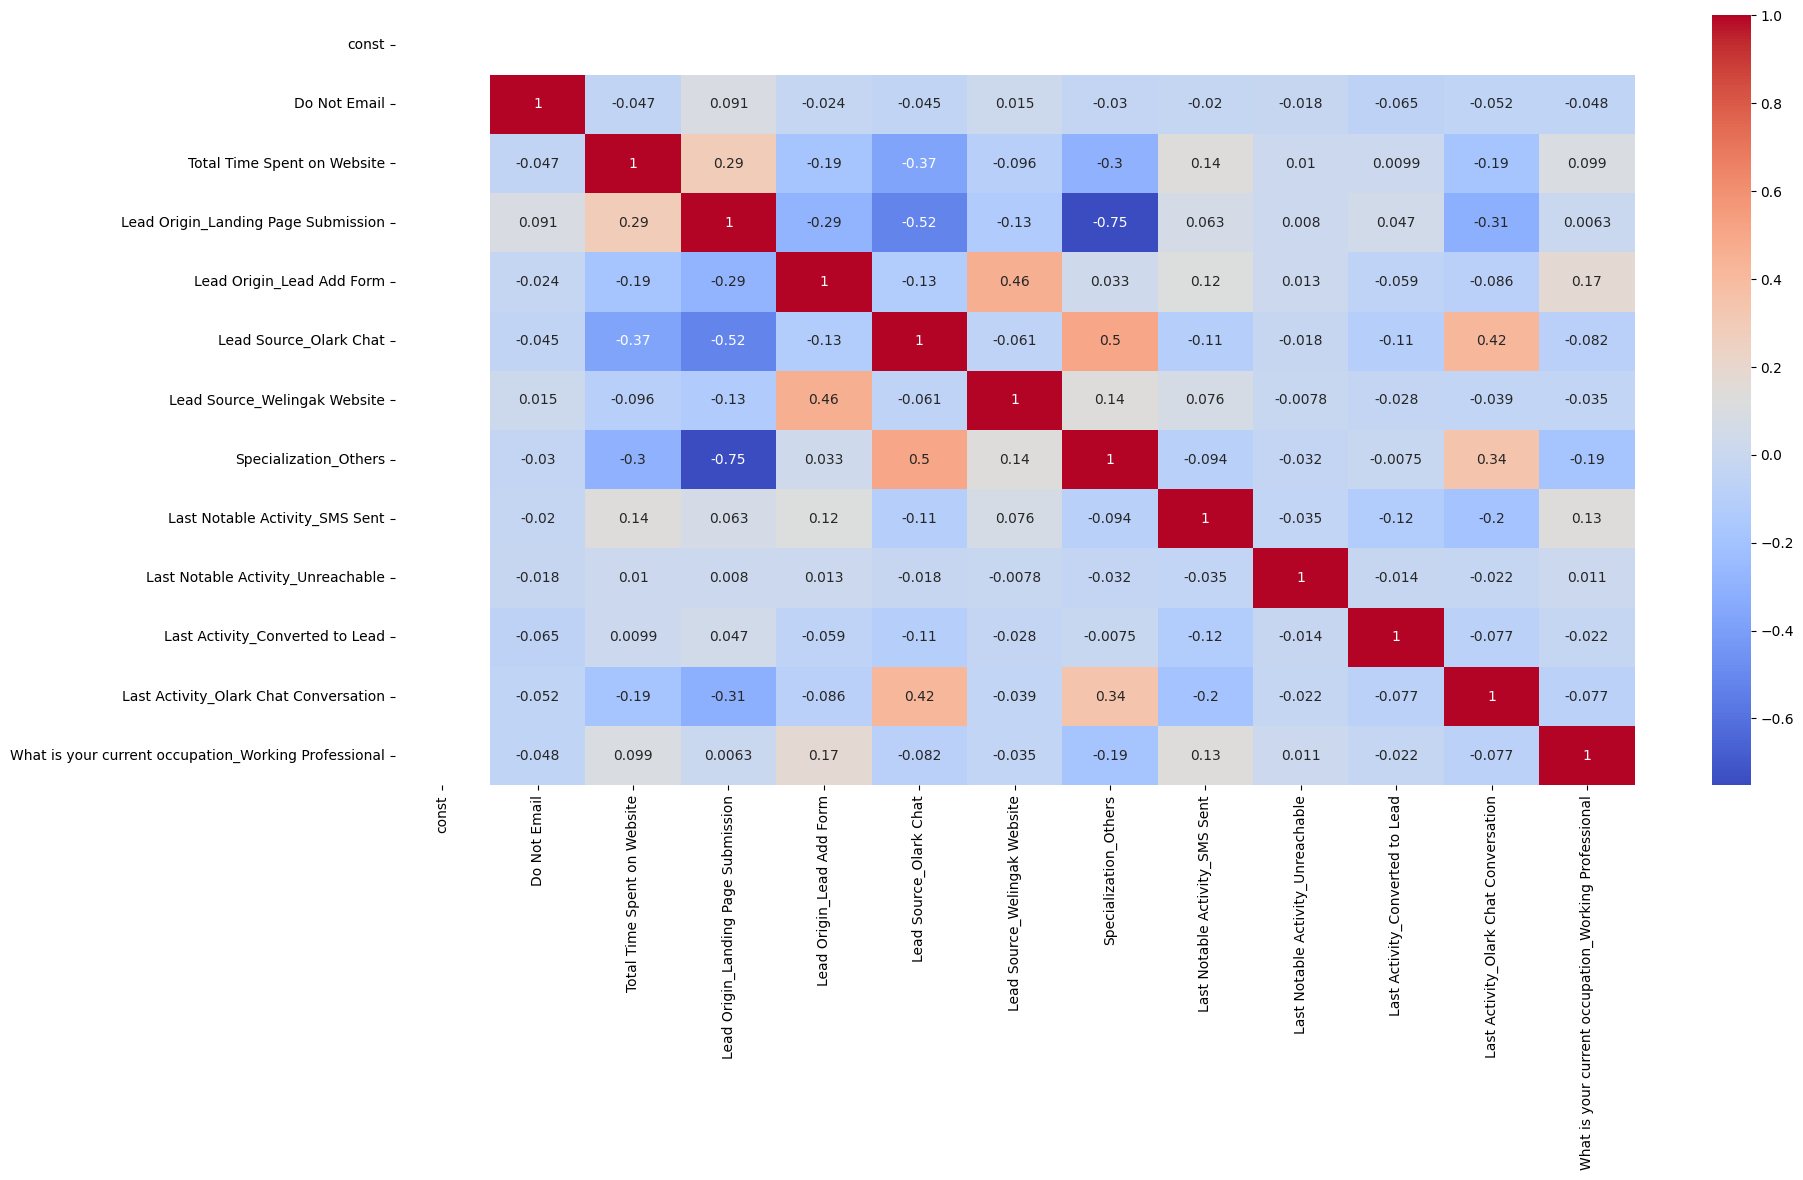

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train_sm.corr(),annot = True,cmap='coolwarm') # Data
plt.show()